# What Do Developers Think About...

In this project, the goal is to find out what developers think about a variety of issues using the Stack Overflow 2018 Developer Survey. 
By analyzing this data, the goal is to:
##    * Type of languages that are popular
##    * Age ranges of developrs
##    * Find the countries with the most new coders
##    * The future of artificial intelligence
##    * Priorities of respondents for jobs
##    * What types of ads are revelant
##    * Find out if developers code as a hobby
##    * How long it takes to get a job after a coding bootcamp
##    * Formal education
##    * Undergraduate degree


In [1]:
# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('survey_results_public.csv',low_memory=False)
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [2]:
# basic info about database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


# Top 7 Languages Used
The top 7 languages used were JavaScript, HTML, CSS, SQL, JAVA, Bash/Shell, and Python in order 

In [3]:
import itertools
# create empty list to store list of languages
languages = []

# iterate through languge column to split columns on ';'
for language in df['LanguageWorkedWith']:
    split_language = str(language).split(';')
    languages.append(split_language)

# since it create list of list, need to flatten into just one list
flat_list = []
for sublist in languages:
    for item in sublist:
        flat_list.append(item)

# create dictionary as frequency table for languages
freq_table = {}
for language in flat_list:
    if language in freq_table.keys():
        freq_table[language] +=1
    else:
        freq_table[language] = 1

# sort dictionary by most used
freq_table = {k: v for k, v in sorted(freq_table.items(), key=lambda item: item[1],reverse=True)}

# get top 7 languages
freq_table = dict(itertools.islice(freq_table.items(), 7))
freq_table

{'JavaScript': 54686,
 'HTML': 53628,
 'CSS': 50979,
 'SQL': 44670,
 'Java': 35521,
 'Bash/Shell': 31172,
 'Python': 30359}

([<matplotlib.axis.YTick at 0x11b424e10>,
 <a list of 7 Text yticklabel objects>)

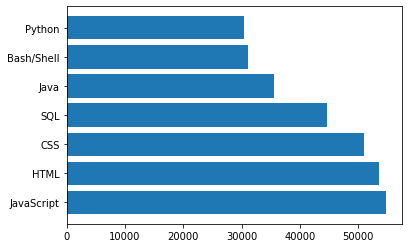

In [4]:
plt.barh(range(len(freq_table)), list(freq_table.values()))
plt.yticks(range(len(freq_table)), list(freq_table.keys()))

# Age Ranges
By far, the highest age demographic is the "25 - 34 year olds."

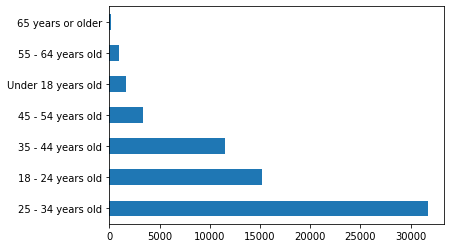

In [5]:
df['Age'].value_counts().plot(kind='barh')

# Countries Represented
The US had the highest percentage of respondents at 21% followed by India at 14%.

In [6]:
round(df['Country'].value_counts(normalize=True)[:10]*100,0)

United States         21.0
India                 14.0
Germany                7.0
United Kingdom         6.0
Canada                 3.0
Russian Federation     3.0
France                 3.0
Brazil                 3.0
Poland                 2.0
Australia              2.0
Name: Country, dtype: float64

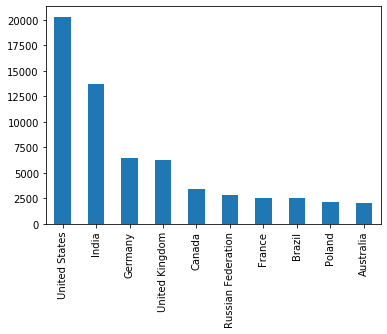

In [7]:
df['Country'].value_counts()[:10].plot('bar')

# Future of AI
In the eyes of most developers that took part in the survey, more than 70% are excited at the possibilities more than worried about the dangers.

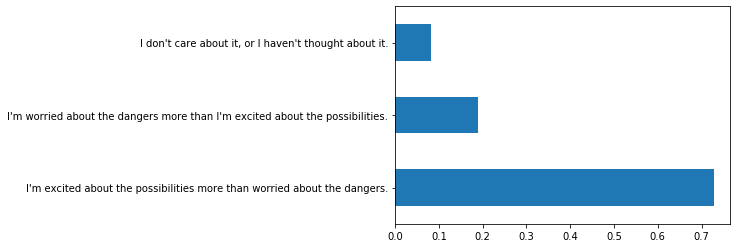

In [8]:
df['AIFuture'].value_counts(normalize=True).plot(kind='barh')

# Top Priorities for Job Assessment
In looking at respondents top pick for Job Assesment, the highest priority was "The compensation and benefits offered." "The languages, frameworks, and other technologies I'd be working with" and "Opportunities for professional development" following close behind.

In [9]:
# create job assesment priorities list
question_list = ["The industry that I'd be working in",
                 "The financial performance or funding status of the company or organization",
                 "The specific department or team I'd be working on",
                 "The languages, frameworks, and other technologies I'd be working with",
                 "The compensation and benefits offered",
                 "The office environment or company culture",
                 "The opportunity to work from home/remotely",
                 "Opportunities for professional development",
                 "The diversity of the company or organization",
                 "How widely used or impactful the product or service I'd be working on is"]
# create list of Job Assessment columns
col_list = ['AssessJob1',
            'AssessJob2','AssessJob3','AssessJob4','AssessJob5','AssessJob6','AssessJob7','AssessJob8','AssessJob9','AssessJob10']
top_list = []
# function to return the top priority of respondents
def top_priorities(df):
    return df[df == 1].shape[0]
for col in col_list:
     top_list.append(top_priorities(df[col]))

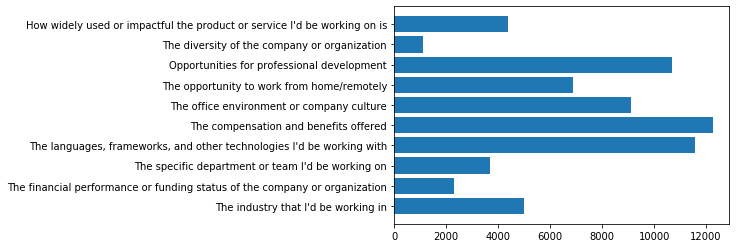

In [10]:
# create bar plot for respondents who thought assessment was top priority
plt.barh(question_list,top_list)
plt.show()

In [11]:
# function to return the lowest priority of respondents
def lowest_priorities(df):
    return df[df == 10].shape[0]
low_list = []
for col in col_list:
    low_list.append(lowest_priorities(df[col]))
low_list

[9163, 9413, 5793, 2145, 1905, 1979, 8345, 1758, 20351, 6132]

# Lowest priorities for Job Assessment 
By far, the lowest job priority was "the diversity of the company or organization." The second and third priorities were "the financial performance or funding status of the company or organization" and ""The industry that I'd be working in" respectively but were quite far away from the lowest priority.

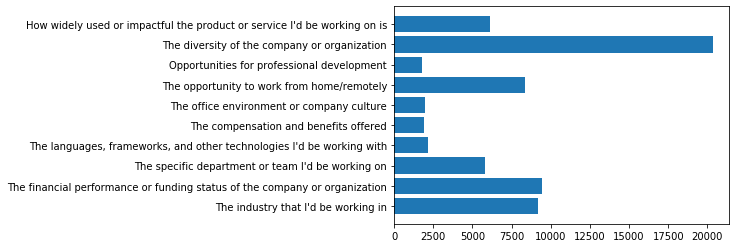

In [12]:
plt.barh(question_list,low_list)
plt.show()

In [13]:
# list the ad questions
ad_list = ["The advertisement is relevant to me",
           "The advertisement is honest about its goals",
           "The advertisement provides useful information",
           "The advertisement seems trustworthy",
           "The advertisement is from a company that I like",
           "The advertisement offers something of value, like a free trial",
           "The advertisement avoids fluffy or vague language"]
col_list_1 = ['AdsPriorities1','AdsPriorities2','AdsPriorities3','AdsPriorities4','AdsPriorities5','AdsPriorities6','AdsPriorities7']
top_ad = []
# go through each col and append top priority to top_ad list
for col in col_list_1:
    top_ad.append(top_priorities(df[col]))

# Advertisement Preferences 
In looking at ad priorities for respondents, the highest rated ad priority was "The advertisement is relevant to me."
The second highest priority was "The advertisement provides useful information."

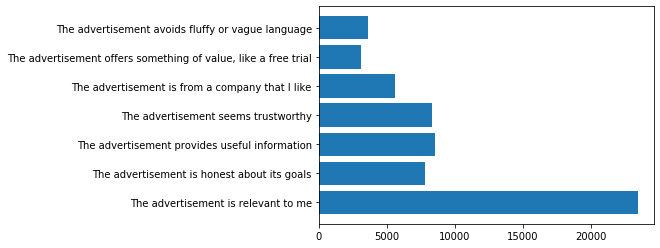

In [14]:
plt.barh(ad_list,top_ad)
plt.show()

# Coding as a hobby
Over 80% of respondents said that they code for a hobby in addition to their jobs. 

In [15]:
# calculate percentage of coding as a hobby
round(df['Hobby'].value_counts(normalize=True)*100,2)

Yes    80.82
No     19.18
Name: Hobby, dtype: float64

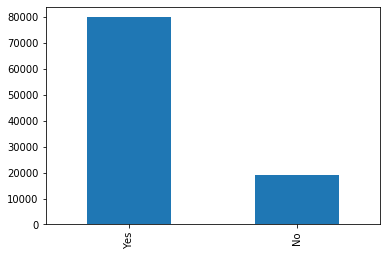

In [16]:
# bar plot for hobby question
df['Hobby'].value_counts().plot(kind='bar')

# Bootcamp and Jobs
In the survey the question was asked: "You indicated previously that you went through a developer training program or bootcamp. How long did it take you to get a full-time job as a developer after graduating?" A higher percentage of people that didn't have a developer job previously, acquired a job immediately, in less than a month or within three months.

In [17]:
# get value counts of job status relating to bootcamps
df['TimeAfterBootcamp'].value_counts()

I already had a full-time job as a developer when I began the program    3025
Immediately after graduating                                             1085
One to three months                                                       668
I haven’t gotten a developer job                                          581
Less than a month                                                         496
Four to six months                                                        347
Six months to a year                                                      239
Longer than a year                                                        211
Name: TimeAfterBootcamp, dtype: int64

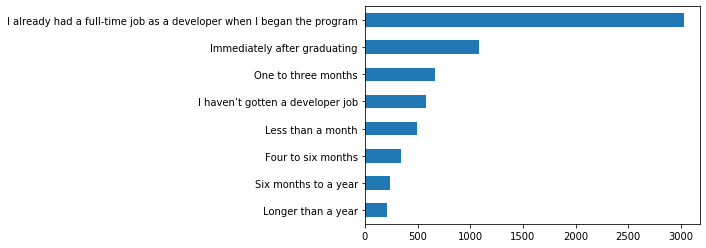

In [18]:
# plot job status and bootcamp info
df['TimeAfterBootcamp'].value_counts(ascending=True).plot(kind='barh')

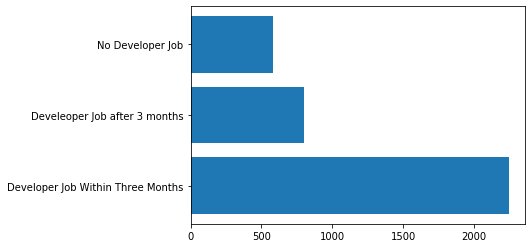

In [19]:
# categorize answers to job placement into three: got job in less than three months, greater than three months, and no job yet
less_than_three = []
greater_than_three = []
less_than_three.append(df[df['TimeAfterBootcamp'] == 'Immediately after graduating'].shape[0])
less_than_three.append(df[df['TimeAfterBootcamp']== 'One to three months'].shape[0])
less_than_three.append(df[df['TimeAfterBootcamp']== 'Less than a month'].shape[0])
greater_than_three.append(df[df['TimeAfterBootcamp'] == 'Four to six months'].shape[0])
greater_than_three.append(df[df['TimeAfterBootcamp'] == 'Six months to a year'].shape[0])
greater_than_three.append(df[df['TimeAfterBootcamp']== 'Longer than a year'].shape[0])
#greater_than_three.append(df[df['TimeAfterBootcamp']== "I haven't gotten a developer job"].shape[0])

total_less_than_three = sum(less_than_three)
total_greater_than_three = sum(greater_than_three)
job_graph = [total_less_than_three,total_greater_than_three,df[df['TimeAfterBootcamp']== "I haven’t gotten a developer job"].shape[0]]

plt.barh(['Developer Job Within Three Months','Develeoper Job after 3 months','No Developer Job'],job_graph)
plt.show()